# Road to Hollywood

## Análisis generales actores premiados con Oscar 

Para la realización de este proyecto hemos introducido una serie de datos de distinto tipo CSV, EXCEL y Web-Scrapping:

- data\oscars3.csv
- data\actor_año_presupuesto_taquilla.ods
- data\imdb_movies_budgets.csv
- data\imdb_top1000_highest_grossing.csv



## Objetivos del análisis

Consejos generales para acompañar al joven actor en su camino al estrellado. 

Este proyecto está orientado a la creación de la guía del actor galardonado.

Nos basaremos en datos de distinto tipo (csv, dataframe propio y web scraping) para analizar los márgenes a los que se puede asociar la cumbre de un actor, en este caso como meta con el premio Oscar.

Buscaremos en ellos, los porcentajes que tienen que ver con la nacionalidad, la raza y la edad, asociados con el director de las películas también más galardonadas.

Hablaremos, de si es influyente o no el presupuesto de la película y el porcentaje de taquilla.

Con todas estas conclusiones podemos ofertar una guia para futuros actores en los que poder brindarles unas directrices para optar al galardón, en base al análisis desde su primer año de gala, 1928 y el último en 2024.



## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de dataframes

In [2]:
#Importamos los csv que vamos a usar.

In [3]:
oscar_df=pd.read_csv("data/the_oscar_award 1927 -2023.csv")

In [4]:
oscar_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [5]:
#Vamos a crear un nuevo df con las caracteristicas que hemos importado, del cs con otras como la raza, edad y nacionalidad.

In [6]:
# Definir los datos en un diccionario
data = { 'Año Ceremonia' : [1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1958,1949,1950,1951,1952,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1963,1965,1966,1967,1968,1969,1070,1071,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,201,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],
    'Nombre': ["Emil Jannings", "Warner Baxter", "Lionel Barrymore", "Wallace Beery", "Fredric March", "Charles Laughton", "Clark Gable", "Victor McLaglen", "Paul Muni", "Spencer Tracy", "Spencer Tracy", "Robert Donat", "James Stewart", "Gary Cooper", "James Cagney", "Paul Lukas", "Bing Crosby", "Ray Milland", "Fredric March", "Ronald Colman", "Laurence Olivier", "Broderick Crawford", "José Ferrer", "Humphrey Bogart", "Gary Cooper", "William Holden", "Marlon Brando", "Ernest Borgnine", "Yul Brynner", "Alec Guinness", "David Niven", "Charlton Heston", "Burt Lancaster", "Maximilian Schell", "Gregory Peck", "Sidney Poitier", "Rex Harrison", "Lee Marvin", "Paul Scofield", "Rod Steiger", "Cliff Robertson", "John Wayne", "George C. Scott", "Gene Hackman", "Marlon Brando", "Jack Lemmon", "Art Carney", "Jack Nicholson", "Peter Finch", "Richard Dreyfuss", "Jon Voight", "Dustin Hoffman", "Robert De Niro", "Henry Fonda", "Ben Kingsley", "Robert Duvall", "F. Murray Abraham", "William Hurt", "Paul Newman", "Michael Douglas", "Dustin Hoffman", "Daniel Day-Lewis", "Jeremy Irons", "Anthony Hopkins", "Al Pacino", "Tom Hanks", "Tom Hanks", "Nicolas Cage", "Geoffrey Rush", "Jack Nicholson", "Roberto Benigni", "Kevin Spacey", "Russell Crowe", "Denzel Washington", "Adrien Brody", "Sean Penn", "Jamie Foxx", "Philip Seymour Hoffman", "Forest Whitaker", "Daniel Day-Lewis", "Sean Penn", "Jeff Bridges", "Colin Firth", "Jean Dujardin", "Daniel Day-Lewis", "Matthew McConaughey", "Eddie Redmayne", "Leonardo DiCaprio", "Casey Affleck", "Gary Oldman", "Rami Malek", "Joaquin Phoenix", "Anthony Hopkins", "Will Smith", "Brendan Fraser", "Colin Farrell", "Cillian Murphy"],
    'Edad': ["45", "40", "53", "51", "37", "34", "34", "49", "42", "36", "37", "33", "32", "41", "42", "50", "41", "38", "45", "52", "41", "44", "41", "54", "53", "35", "30", "42", "39", "53", "49", "36", "46", "41", "46", "37", "57", "49", "46", "45", "41", "62", "43", "41", "48", "48", "55", "38", "59", "41", "39", "37", "36", "76", "45", "47", "46", "45", "35", "61", "43", "51", "48", "45", "47", "55", "63", "39", "41", "38", "37", "44", "41", "30", "43", "37", "46", "37", "45", "47", "39", "41", "36", "62", "50", "43", "55", "44", "41", "33", "41", "44", "62", "45", "41", "46", "37"],
    'Raza': ["Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Hispano", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Afroamericana", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Afroamericana", "Blanca", "Blanca", "Afroamericana", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Afroamericana", "Blanca", "Blanca", "Blanca", "Blanca", "Blanca", "Afroamericana", "Blanca", "Blanca", "Blanca"],
    'Pais': ["Alemania", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Reino Unido", "Estados Unidos", "Reino Unido", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Reino Unido", "Estados Unidos", "Estados Unidos", "Hungría", "Estados Unidos", "Reino Unido", "Estados Unidos", "Reino Unido", "Estados Unidos", "Puerto Rico", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Rusia", "Reino Unido", "Reino Unido", "Estados Unidos", "Estados Unidos", "Austria", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Reino Unido", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Reino Unido", "Estados Unidos", "Australia", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Reino Unido", "Reino Unido", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Reino Unido", "Reino Unido", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Nueva Zelanda", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Reino Unido", "Estados Unidos", "Reino Unido", "Francia", "Reino Unido", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Reino Unido", "Reino Unido", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Estados Unidos", "Reino Unido", "Irlanda", "Irlanda", "Estados Unidos"]
}

# Comprobamos que todas las listas tenga la misma longitud y en caso de que no, agregamos NaN.( por los valores que nos faltan)
max_length = max(len(data['Nombre']), len(data['Año Ceremonia']), len(data['Edad']), len(data['Raza']), len(data['Pais']))

for key in data:
    while len(data[key]) < max_length:
        data[key].append(np.nan)

# Convertimos el diccionario en un dataframe nuevo, más especifico para tenrlo listo para hacer el merg.
df_caracteristicas_de_los_actores  = pd.DataFrame(data)

In [7]:
print (df_caracteristicas_de_los_actores)

    Año Ceremonia            Nombre Edad    Raza            Pais
0            1928     Emil Jannings   45  Blanca        Alemania
1            1929     Warner Baxter   40  Blanca  Estados Unidos
2            1930  Lionel Barrymore   53  Blanca  Estados Unidos
3            1931     Wallace Beery   51  Blanca  Estados Unidos
4            1932     Fredric March   37  Blanca  Estados Unidos
..            ...               ...  ...     ...             ...
92           2019   Anthony Hopkins   62  Blanca             NaN
93           2020        Will Smith   45  Blanca             NaN
94           2021    Brendan Fraser   41     NaN             NaN
95           2022     Colin Farrell   46     NaN             NaN
96           2023    Cillian Murphy   37     NaN             NaN

[97 rows x 5 columns]


In [8]:
#Empezaremos por tanto el proceso de limpieza en este nuevo df

In [9]:
#Como vemos, hay algunos valores erróneos, por lo que haremos cambios en las filas que tiene datos vacío o que están incorrectos.

In [10]:
df_caracteristicas_de_los_actores

,Año Ceremonia,Nombre,Edad,Raza,Pais
0,1928,Emil Jannings,45,Blanca,Alemania
1,1929,Warner Baxter,40,Blanca,Estados Unidos
2,1930,Lionel Barrymore,53,Blanca,Estados Unidos
3,1931,Wallace Beery,51,Blanca,Estados Unidos
4,1932,Fredric March,37,Blanca,Estados Unidos
...,...,...,...,...,...
92,2019,Anthony Hopkins,62,Blanca,NaN
93,2020,Will Smith,45,Blanca,NaN
94,2021,Brendan Fraser,41,NaN,NaN
95,2022,Colin Farrell,46,NaN,NaN


In [11]:
df_caracteristicas_de_los_actores.loc[93, 'Raza'] = "Afroamericano"
df_caracteristicas_de_los_actores.loc[94, 'Raza'] = "Blanca"
df_caracteristicas_de_los_actores.loc[95, 'Raza'] = "Blanca"
df_caracteristicas_de_los_actores.loc[96, 'Raza'] = "Blanca"

In [12]:
#Los valores faltantes en raza, están terminados y corregidos.
#Ahora terminaremos las nacionalidades

In [13]:
df_caracteristicas_de_los_actores.loc[92, 'Pais'] = "Estados Unidos"
df_caracteristicas_de_los_actores.loc[93, 'Pais'] = "Estados Unidos"
df_caracteristicas_de_los_actores.loc[94, 'Pais'] = "Estados Unidos"
df_caracteristicas_de_los_actores.loc[95, 'Pais'] = "Irlanda"
df_caracteristicas_de_los_actores.loc[96, 'Pais'] = "Irlanda"

In [14]:
df_caracteristicas_de_los_actores

,Año Ceremonia,Nombre,Edad,Raza,Pais
0,1928,Emil Jannings,45,Blanca,Alemania
1,1929,Warner Baxter,40,Blanca,Estados Unidos
2,1930,Lionel Barrymore,53,Blanca,Estados Unidos
3,1931,Wallace Beery,51,Blanca,Estados Unidos
4,1932,Fredric March,37,Blanca,Estados Unidos
...,...,...,...,...,...
92,2019,Anthony Hopkins,62,Blanca,Estados Unidos
93,2020,Will Smith,45,Afroamericano,Estados Unidos
94,2021,Brendan Fraser,41,Blanca,Estados Unidos
95,2022,Colin Farrell,46,Blanca,Irlanda


In [15]:
df_caracteristicas_de_los_actores.describe(include='object').T

# exportamos el df a un csv para poder trabajar con el en el siguiente paso
df_caracteristicas_de_los_actores.to_csv('data/processed/df_caracteristicas_de_los_actores.csv', index=False)

Principales conclusiones.
 1) El actor más premiado es Daniel Day-Lewis.
 2) La raza o etnia con más premios es la Blanca.
 3) El país con mayor número de ganadores es Estados unidos.
 4) La media de edad se situa en los 41 años.

In [16]:
final=pd.read_csv("data/processed/df_final_1.csv")

In [17]:
#siguiente csv.

In [18]:
actor_df=pd.read_csv('data/best_actor_winners_1928-2023.csv',encoding='utf-8')

In [19]:
actor_df.head()

,Year,Actor,Role(s),Film,Age,Nationality
0,1928 \n,Emil Jannings,Grand Duke Sergius Alexander,The Last Command,44,German
1,1929\n,Warner Baxter,The Cisco Kid,In Old Arizona,39,American
2,1930 \n,George Arliss,Benjamin Disraeli,Disraeli,61,British
3,1931 \n,Lionel Barrymore,Stephen Ashe,A Free Soul,53,American
4,1932 \n,Wallace Beery,"Andy ""Champ"" Purcell",The Champ,48,American


In [20]:
#Comprobamos los nulos.
actor_df.isnull().sum()

Year           0
Actor          0
Role(s)        0
Film           0
Age            0
Nationality    0
dtype: int64

In [21]:
#los valores únicos
actor_df['Year'].unique()

array(['1928 \n', '1929\n', '1930 \n', '1931 \n', '1932 \n', '1933 \n',
       '1934 \n', '1935 \n', '1936 \n', '1937 \n', '1938 \n', '1939 \n',
       '1940 \n', '1941 \n', '1942 \n', '1943 \n', '1944 \n', '1945 \n',
       '1946 \n', '1947 \n', '1948 \n', '1949 \n', '1950 \n', '1951 \n',
       '1952 \n', '1953 \n', '1954 \n', '1955 \n', '1956 \n', '1957 \n',
       '1958 \n', '1959 \n', '1960 \n', '1961 \n', '1962 \n', '1963 \n',
       '1964 \n', '1965 \n', '1966 \n', '1967 \n', '1968 \n', '1969 \n',
       '1970 \n', '1971 \n', '1972 \n', '1973 \n', '1974 \n', '1975 \n',
       '1976 \n', '1977 \n', '1978 \n', '1979 \n', '1980 \n', '1981 \n',
       '1982 \n', '1983 \n', '1984 \n', '1985 \n', '1986 \n', '1987 \n',
       '1988 \n', '1989 \n', '1990 \n', '1991 \n', '1992 \n', '1993 \n',
       '1994 \n', '1995 \n', '1996 \n', '1997 \n', '1998 \n', '1999 \n',
       '2000 \n', '2001 \n', '2002 \n', '2003 \n', '2004 \n', '2005 \n',
       '2006 \n', '2007 \n', '2008 \n', '2009 \n', '

In [22]:
#Limpiamos espacios.
actor_df['Year'] = actor_df['Year'].str.replace(r'\D', '', regex=True)

In [23]:
oscars3_df=pd.read_csv('data/oscars3.csv')

In [24]:
#Camniamos el nombre para llevar orden de las actualizaciones.
oscars3_df_1928=oscars3_df[oscars3_df['year_ceremony']==1928]
oscars3_df_1928

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,False
8,1927,1928,1,CINEMATOGRAPHY,George Barnes,The Devil Dancer;,False
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True


In [25]:
#Buscamos los valores únicos dentro de la columna categoría.
oscars3_df['category'].unique

<bound method Series.unique of 0                                   ACTOR
1                                   ACTOR
2                                 ACTRESS
3                                 ACTRESS
4                                 ACTRESS
                       ...               
10884       WRITING (Original Screenplay)
10885    JEAN HERSHOLT HUMANITARIAN AWARD
10886                      HONORARY AWARD
10887                      HONORARY AWARD
10888                      HONORARY AWARD
Name: category, Length: 10889, dtype: object>

In [26]:
#Cambiamos algunos nombres de columna para que la información sea más clara.
oscars3_df2 = oscars3_df[oscars3_df['category'].isin(['ACTOR','ACTOR IN A LEADING ROLE','Actor In A Leading Role'])]

In [27]:
#Reseteamos índice 
oscars3_df2.reset_index(drop=True, inplace=True)

In [28]:
#Añadimos columnas nuevas.
oscars3_df2.insert(loc=5, column="Edad", value=pd.NA)
oscars3_df2.insert(loc=6, column="Nacionalidad", value=pd.NA)
oscars3_df2.insert(loc=6, column="Raza", value=pd.NA)

In [29]:
oscars3_df2.tail ()

,year_film,year_ceremony,ceremony,category,name,Edad,Raza,Nacionalidad,film,winner
467,2023,2024,96,ACTOR IN A LEADING ROLE,Bradley Cooper,<NA>,<NA>,<NA>,Maestro,False
468,2023,2024,96,ACTOR IN A LEADING ROLE,Colman Domingo,<NA>,<NA>,<NA>,Rustin,False
469,2023,2024,96,ACTOR IN A LEADING ROLE,Paul Giamatti,<NA>,<NA>,<NA>,The Holdovers,False
470,2023,2024,96,ACTOR IN A LEADING ROLE,Cillian Murphy,<NA>,<NA>,<NA>,Oppenheimer,True
471,2023,2024,96,ACTOR IN A LEADING ROLE,Jeffrey Wright,<NA>,<NA>,<NA>,American Fiction,False


In [30]:
oscars3_df2['category']= 'actor'


C:\Users\jesus\AppData\Local\Temp\ipykernel_9612\3299785396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars3_df2['category']= 'actor'


In [31]:
oscars3_df2.tail()

,year_film,year_ceremony,ceremony,category,name,Edad,Raza,Nacionalidad,film,winner
467,2023,2024,96,actor,Bradley Cooper,<NA>,<NA>,<NA>,Maestro,False
468,2023,2024,96,actor,Colman Domingo,<NA>,<NA>,<NA>,Rustin,False
469,2023,2024,96,actor,Paul Giamatti,<NA>,<NA>,<NA>,The Holdovers,False
470,2023,2024,96,actor,Cillian Murphy,<NA>,<NA>,<NA>,Oppenheimer,True
471,2023,2024,96,actor,Jeffrey Wright,<NA>,<NA>,<NA>,American Fiction,False


In [32]:
oscars3_df2

,year_film,year_ceremony,ceremony,category,name,Edad,Raza,Nacionalidad,film,winner
0,1927,1928,1,actor,Richard Barthelmess,<NA>,<NA>,<NA>,The Noose,False
1,1927,1928,1,actor,Emil Jannings,<NA>,<NA>,<NA>,The Last Command,True
2,1928,1929,2,actor,George Bancroft,<NA>,<NA>,<NA>,Thunderbolt,False
3,1928,1929,2,actor,Warner Baxter,<NA>,<NA>,<NA>,In Old Arizona,True
4,1928,1929,2,actor,Chester Morris,<NA>,<NA>,<NA>,Alibi,False
...,...,...,...,...,...,...,...,...,...,...
467,2023,2024,96,actor,Bradley Cooper,<NA>,<NA>,<NA>,Maestro,False
468,2023,2024,96,actor,Colman Domingo,<NA>,<NA>,<NA>,Rustin,False
469,2023,2024,96,actor,Paul Giamatti,<NA>,<NA>,<NA>,The Holdovers,False
470,2023,2024,96,actor,Cillian Murphy,<NA>,<NA>,<NA>,Oppenheimer,True


In [33]:
oscars3_df2= oscars3_df2.drop(columns=['category'])

In [73]:
# Drop column "year_film" from "oscars3_df2"
#oscars3_df2.drop(columns='year_film', inplace=True)

oscars3_df2.head()

# Exportamos el df a un csv para poder trabajar con el en el siguiente paso
# oscars3_df2.to_csv('data/processed/tabla_actores2.csv', index=False)


,year_ceremony,ceremony,Edad,Raza,Nacionalidad,film,winner,name
0,1928,1,<NA>,<NA>,<NA>,The Noose,False,Richard Barthelmess
1,1928,1,<NA>,<NA>,<NA>,The Last Command,True,Emil Jannings
2,1929,2,<NA>,<NA>,<NA>,Thunderbolt,False,George Bancroft
3,1929,2,<NA>,<NA>,<NA>,In Old Arizona,True,Warner Baxter
4,1929,2,<NA>,<NA>,<NA>,Alibi,False,Chester Morris


In [35]:
directores= oscars3_df

In [36]:
directores['category'].nunique()

115

In [37]:
# directores_filtrado = directores.loc[directores['winner'] == True, ['category'].str.contains('DIRECTING', case=False, na=False)]

directores_filtrado = directores.loc[(directores['winner'] == True) & (directores['category'].str.contains('DIRECTING', case=False, na=False))]

In [38]:
directores_filtrado1 = directores.loc[
    (directores['winner'] == True) & 
    (directores['category'].str.contains('DIRECTING', case=False, na=False))]

In [39]:
directores_filtrado1

,year_film,year_ceremony,ceremony,category,name,film,winner
11,1927,1928,1,DIRECTING (Comedy Picture),Lewis Milestone,Two Arabian Knights,True
13,1927,1928,1,DIRECTING (Dramatic Picture),Frank Borzage,7th Heaven,True
59,1928,1929,2,DIRECTING,Frank Lloyd,The Divine Lady,True
98,1929,1930,3,DIRECTING,Lewis Milestone,All Quiet on the Western Front,True
139,1930,1931,4,DIRECTING,Norman Taurog,Skippy,True
...,...,...,...,...,...,...,...
10306,2019,2020,92,DIRECTING,Bong Joon Ho,Parasite,True
10433,2020,2021,93,DIRECTING,Chloé Zhao,Nomadland,True
10553,2021,2022,94,DIRECTING,Jane Campion,The Power of the Dog,True
10675,2022,2023,95,DIRECTING,Daniel Kwan and Daniel Scheinert,Everything Everywhere All at Once,True


In [40]:
directores_filtrado1.drop(columns=['year_film','ceremony',],inplace=True)

C:\Users\jesus\AppData\Local\Temp\ipykernel_9612\625187862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directores_filtrado1.drop(columns=['year_film','ceremony',],inplace=True)


In [41]:
directores_filtrado['category'].unique ()

array(['DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'DIRECTING'], dtype=object)

In [42]:
directores_filtrado.loc[:,'category']='director'

In [43]:
directores_filtrado

,year_film,year_ceremony,ceremony,category,name,film,winner
11,1927,1928,1,director,Lewis Milestone,Two Arabian Knights,True
13,1927,1928,1,director,Frank Borzage,7th Heaven,True
59,1928,1929,2,director,Frank Lloyd,The Divine Lady,True
98,1929,1930,3,director,Lewis Milestone,All Quiet on the Western Front,True
139,1930,1931,4,director,Norman Taurog,Skippy,True
...,...,...,...,...,...,...,...
10306,2019,2020,92,director,Bong Joon Ho,Parasite,True
10433,2020,2021,93,director,Chloé Zhao,Nomadland,True
10553,2021,2022,94,director,Jane Campion,The Power of the Dog,True
10675,2022,2023,95,director,Daniel Kwan and Daniel Scheinert,Everything Everywhere All at Once,True


In [44]:
directores_filtrado1

,year_ceremony,category,name,film,winner
11,1928,DIRECTING (Comedy Picture),Lewis Milestone,Two Arabian Knights,True
13,1928,DIRECTING (Dramatic Picture),Frank Borzage,7th Heaven,True
59,1929,DIRECTING,Frank Lloyd,The Divine Lady,True
98,1930,DIRECTING,Lewis Milestone,All Quiet on the Western Front,True
139,1931,DIRECTING,Norman Taurog,Skippy,True
...,...,...,...,...,...
10306,2020,DIRECTING,Bong Joon Ho,Parasite,True
10433,2021,DIRECTING,Chloé Zhao,Nomadland,True
10553,2022,DIRECTING,Jane Campion,The Power of the Dog,True
10675,2023,DIRECTING,Daniel Kwan and Daniel Scheinert,Everything Everywhere All at Once,True


In [45]:
# Guardar en un archivo CSV el dataframe directores_filtrado1
directores_filtrado1.to_csv('data/processed/directores_filtrado.csv', index=False)


# En este punto donde tenemos nuestras tres tablas limpias y preparadas, comenzamos el proceso de merge.

En primer lugar, mergeamos la tabla de actores para introducir sus datos demográficos

In [46]:
oscars3_df2 
df_caracteristicas_actores = pd.read_csv('data/processed/df_caracteristicas_de_los_actores.csv')

In [47]:
df_caracteristicas_actores.rename(columns = {'Nombre': 'name'}, inplace=True)
df_caracteristicas_actores.rename(columns = {'Pais': 'nacionalidad'}, inplace=True)


df_caracteristicas_actores.drop(columns = ['Año Ceremonia'], inplace=True)

df_caracteristicas_actores.columns = df_caracteristicas_actores.columns.str.lower().str.replace(' ', '_').str.strip()

In [48]:
oscars3_df2.shape

(472, 8)

In [49]:
oscars3_df2

,year_ceremony,ceremony,name,Edad,Raza,Nacionalidad,film,winner
0,1928,1,Richard Barthelmess,<NA>,<NA>,<NA>,The Noose,False
1,1928,1,Emil Jannings,<NA>,<NA>,<NA>,The Last Command,True
2,1929,2,George Bancroft,<NA>,<NA>,<NA>,Thunderbolt,False
3,1929,2,Warner Baxter,<NA>,<NA>,<NA>,In Old Arizona,True
4,1929,2,Chester Morris,<NA>,<NA>,<NA>,Alibi,False
...,...,...,...,...,...,...,...,...
467,2024,96,Bradley Cooper,<NA>,<NA>,<NA>,Maestro,False
468,2024,96,Colman Domingo,<NA>,<NA>,<NA>,Rustin,False
469,2024,96,Paul Giamatti,<NA>,<NA>,<NA>,The Holdovers,False
470,2024,96,Cillian Murphy,<NA>,<NA>,<NA>,Oppenheimer,True


In [50]:
columns_name=oscars3_df2.pop('name')

In [51]:
oscars3_df2['name']=columns_name

In [52]:
oscars3_df2

,year_ceremony,ceremony,Edad,Raza,Nacionalidad,film,winner,name
0,1928,1,<NA>,<NA>,<NA>,The Noose,False,Richard Barthelmess
1,1928,1,<NA>,<NA>,<NA>,The Last Command,True,Emil Jannings
2,1929,2,<NA>,<NA>,<NA>,Thunderbolt,False,George Bancroft
3,1929,2,<NA>,<NA>,<NA>,In Old Arizona,True,Warner Baxter
4,1929,2,<NA>,<NA>,<NA>,Alibi,False,Chester Morris
...,...,...,...,...,...,...,...,...
467,2024,96,<NA>,<NA>,<NA>,Maestro,False,Bradley Cooper
468,2024,96,<NA>,<NA>,<NA>,Rustin,False,Colman Domingo
469,2024,96,<NA>,<NA>,<NA>,The Holdovers,False,Paul Giamatti
470,2024,96,<NA>,<NA>,<NA>,Oppenheimer,True,Cillian Murphy


In [53]:
df_caracteristicas_actores

,name,edad,raza,nacionalidad
0,Emil Jannings,45,Blanca,Alemania
1,Warner Baxter,40,Blanca,Estados Unidos
2,Lionel Barrymore,53,Blanca,Estados Unidos
3,Wallace Beery,51,Blanca,Estados Unidos
4,Fredric March,37,Blanca,Estados Unidos
...,...,...,...,...
92,Anthony Hopkins,62,Blanca,Estados Unidos
93,Will Smith,45,Afroamericano,Estados Unidos
94,Brendan Fraser,41,Blanca,Estados Unidos
95,Colin Farrell,46,Blanca,Irlanda


In [54]:
#df_caracteristicas_actores.head()


df_final = pd.merge(oscars3_df2, df_caracteristicas_actores, on='name', how='left')

# reorder columns in this order: name, edad, raza, nacionalidad, winner, film, year_ceremony
df_final = df_final[['name', 'edad', 'raza', 'nacionalidad', 'winner', 'film', 'year_ceremony']]

df_final.to_csv('data/processed/tabla_actores.csv', index=False)

df_final.head()

,name,edad,raza,nacionalidad,winner,film,year_ceremony
0,Richard Barthelmess,NaN,NaN,NaN,False,The Noose,1928
1,Emil Jannings,45.0,Blanca,Alemania,True,The Last Command,1928
2,George Bancroft,NaN,NaN,NaN,False,Thunderbolt,1929
3,Warner Baxter,40.0,Blanca,Estados Unidos,True,In Old Arizona,1929
4,Chester Morris,NaN,NaN,NaN,False,Alibi,1929


Y ahora realizaremos un merge para ver la taquilla orientada a las películas y sus directores.

In [82]:
# df_final=df_final.reset_index()

# Reset index
df_final.reset_index(drop=True, inplace=True)

# export to csv
df_final.to_csv('data/processed/tabla_actores2.csv', index=False)


## Gráficas

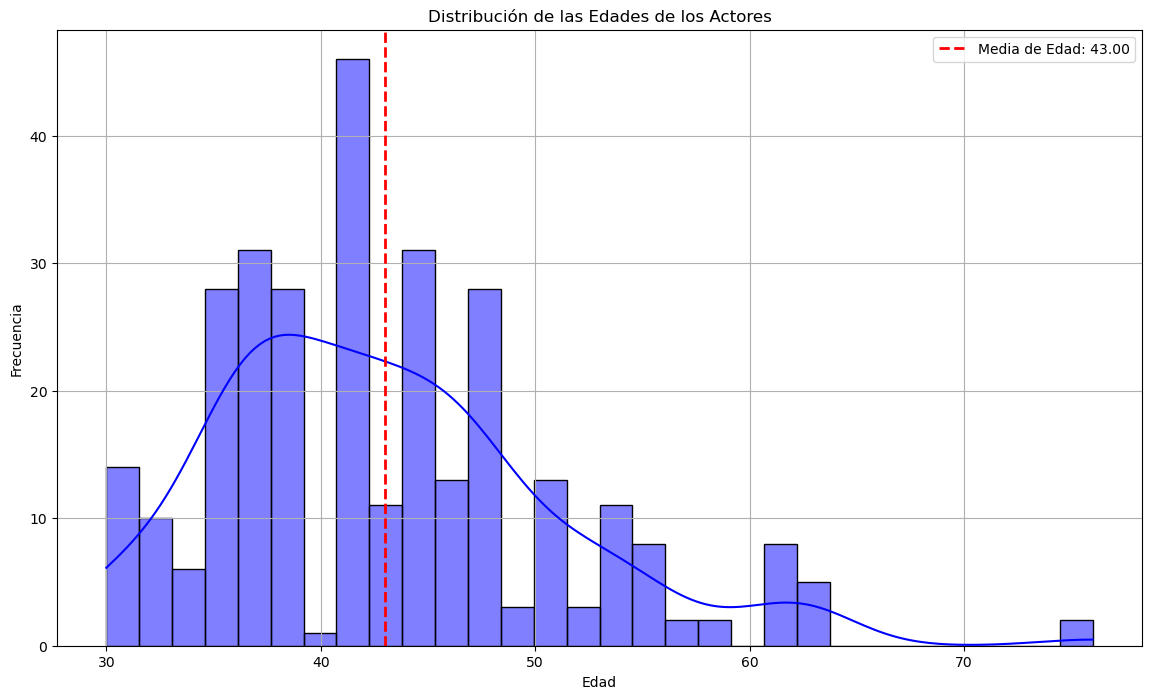

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV en un DataFrame
df_actores = pd.read_csv('data/processed/tabla_actores2.csv')

# Convertir la columna 'edad' a tipo numérico
df_actores['edad'] = pd.to_numeric(df_actores['edad'], errors='coerce')

# Calcular la media de edad
mean_age = df_actores['edad'].mean()

# Crear un histograma con la curva de distribución de las edades de los actores
plt.figure(figsize=(14, 8))
sns.histplot(df_actores['edad'], kde=True, color='blue', bins=30)

# Añadir una línea vertical para la media de edad
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Media de Edad: {mean_age:.2f}')

# Añadir títulos y etiquetas
plt.title('Distribución de las Edades de los Actores')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

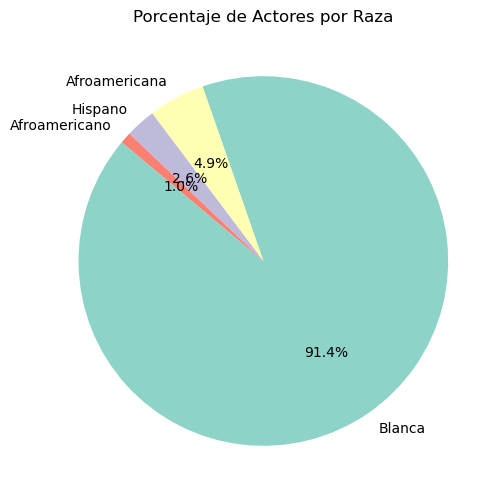

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el CSV en un DataFrame
df_actores = pd.read_csv('data/processed/tabla_actores2.csv')

# Contar la cantidad de actores por raza
raza_counts = df_actores['raza'].value_counts(normalize=True) * 100

# Crear una gráfica de pastel para mostrar el porcentaje de actores por raza
plt.figure(figsize=(10, 6))
raza_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(raza_counts)))

# Añadir título
plt.title('Porcentaje de Actores por Raza')

# Mostrar la gráfica
plt.ylabel('')
plt.show()

C:\Users\jesus\AppData\Local\Temp\ipykernel_9612\911217804.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nacionalidad_counts.values, y=nacionalidad_counts.index, palette='viridis')


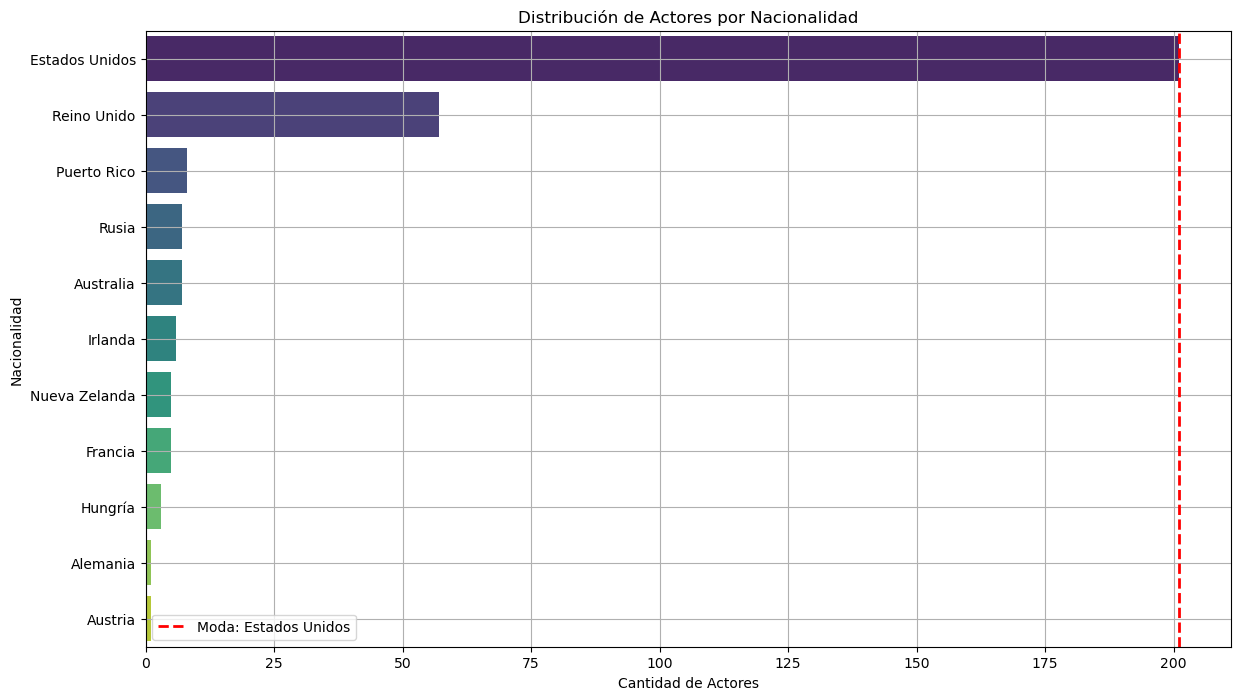

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV en un DataFrame
df_actores = pd.read_csv('data/processed/tabla_actores2.csv')

# Calcular la moda de la columna 'nacionalidad'
mode_nacionalidad = df_actores['nacionalidad'].mode()[0]

# Contar la cantidad de actores por nacionalidad
nacionalidad_counts = df_actores['nacionalidad'].value_counts()

# Crear una gráfica de barras para mostrar la distribución de actores por nacionalidad
plt.figure(figsize=(14, 8))
sns.barplot(x=nacionalidad_counts.values, y=nacionalidad_counts.index, palette='viridis')

# Añadir una línea vertical para la moda de nacionalidad
plt.axvline(nacionalidad_counts[mode_nacionalidad], color='red', linestyle='--', linewidth=2, label=f'Moda: {mode_nacionalidad}')

# Añadir títulos y etiquetas
plt.title('Distribución de Actores por Nacionalidad')
plt.xlabel('Cantidad de Actores')
plt.ylabel('Nacionalidad')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\jesus\AppData\Local\Temp\ipykernel_9612\997609688.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='viridis')


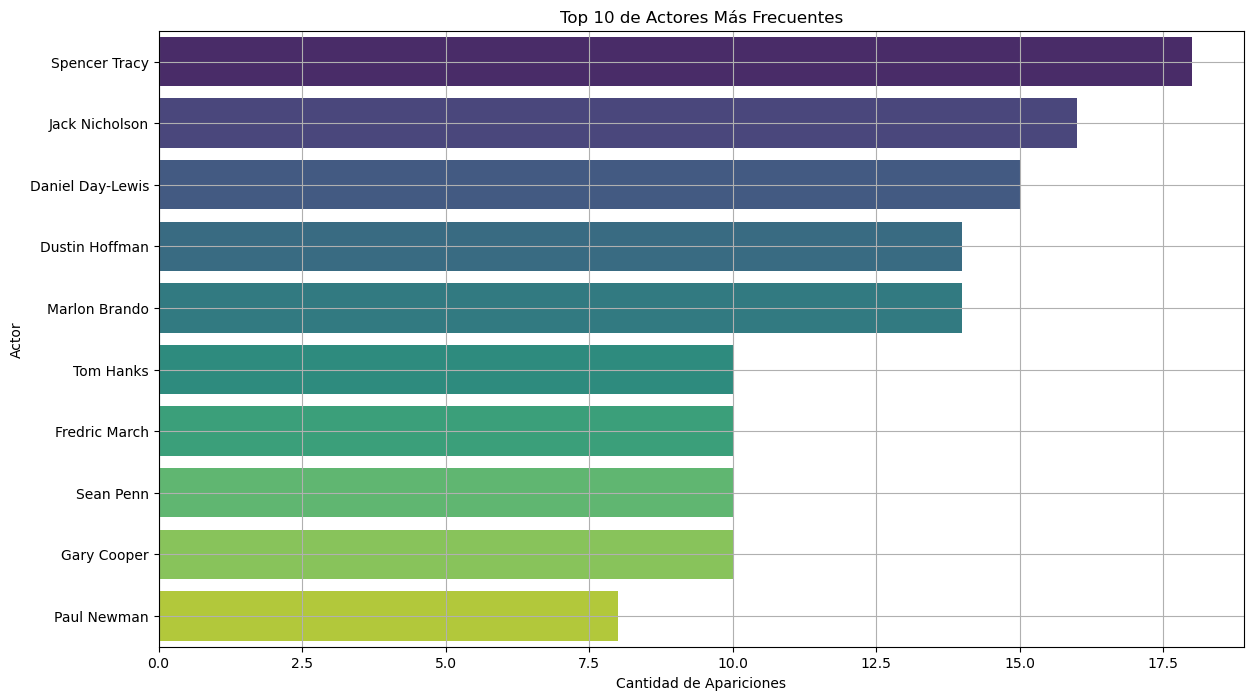

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV en un DataFrame
df_actores = pd.read_csv('data/processed/tabla_actores2.csv')

# Contar la cantidad de apariciones de cada actor
actor_counts = df_actores['name'].value_counts().head(10)

# Crear una gráfica de barras para mostrar el top 10 de actores más frecuentes
plt.figure(figsize=(14, 8))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Top 10 de Actores Más Frecuentes')
plt.xlabel('Cantidad de Apariciones')
plt.ylabel('Actor')
plt.grid(True)
plt.show()

In [56]:
presupuesto= pd.read_csv('data/processed/actor_año_presupuesto_taquilla.csv')

In [57]:
columna_film= directores_filtrado1.pop('film')

In [58]:
directores_filtrado1['film']=columna_film

C:\Users\jesus\AppData\Local\Temp\ipykernel_9612\1630185050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directores_filtrado1['film']=columna_film


In [59]:
presupuesto

,name,Película,year_ceremony,Presupuesto,Taquilla
0,Emil Jannings,The Last Command,1928,1.5 millones,2 millones
1,Warner Baxter,In Old Arizona,1929,1.2 millones,1.5 millones
2,Lionel Barrymore,A Free Soul,1930,1.1 millones,1.3 millones
3,Fredric March,The Champ,1931,1.2 millones,2.5 millones
4,Clark Gable,It Happened One Night,1934,325,2.1 millones
5,Spencer Tracy,Captains Courageous,1937,1.6 millones,2.5 millones
6,Gary Cooper,Sergeant York,1941,2 millones,6.3 millones
7,James Cagney,Yankee Doodle Dandy,1942,1.5 millones,6.4 millones
8,Bing Crosby,Going My Way,1944,2 millones,8.2 millones
9,Fredric March,The Best Years of Our Lives,1946,2.5 millones,23 millones


In [60]:
presupuesto= presupuesto.rename(columns={'Película':'film'})

In [61]:
presupuesto

,name,film,year_ceremony,Presupuesto,Taquilla
0,Emil Jannings,The Last Command,1928,1.5 millones,2 millones
1,Warner Baxter,In Old Arizona,1929,1.2 millones,1.5 millones
2,Lionel Barrymore,A Free Soul,1930,1.1 millones,1.3 millones
3,Fredric March,The Champ,1931,1.2 millones,2.5 millones
4,Clark Gable,It Happened One Night,1934,325,2.1 millones
5,Spencer Tracy,Captains Courageous,1937,1.6 millones,2.5 millones
6,Gary Cooper,Sergeant York,1941,2 millones,6.3 millones
7,James Cagney,Yankee Doodle Dandy,1942,1.5 millones,6.4 millones
8,Bing Crosby,Going My Way,1944,2 millones,8.2 millones
9,Fredric March,The Best Years of Our Lives,1946,2.5 millones,23 millones


In [ ]:
#presupuesto.drop(columns=['name','year_ceremony'],inplace=True)

# exporta presupuesto a csv
#presupuesto.to_csv('data/processed/presupuesto.csv', index=False)


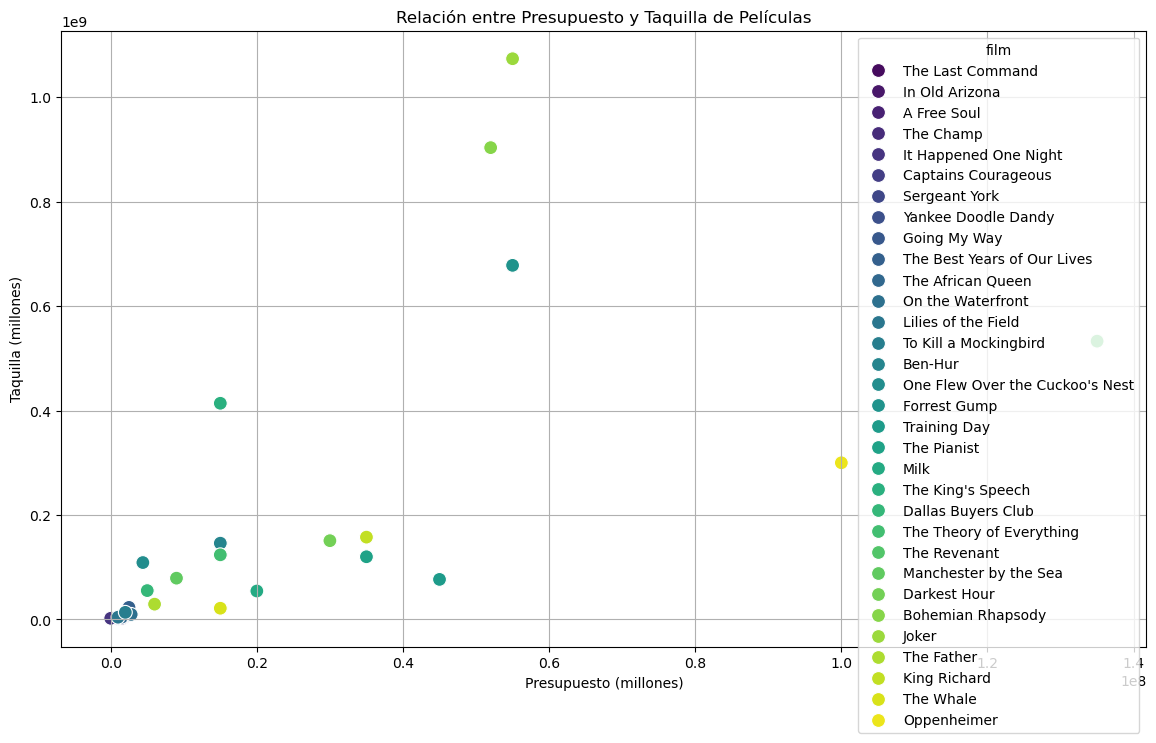

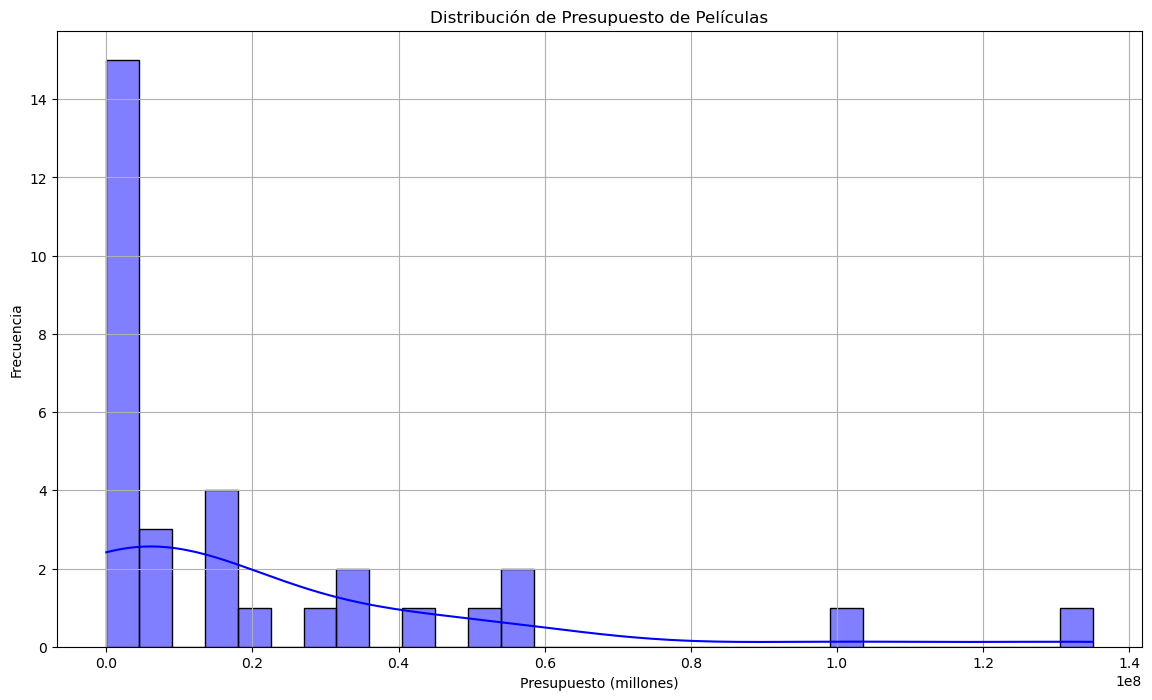

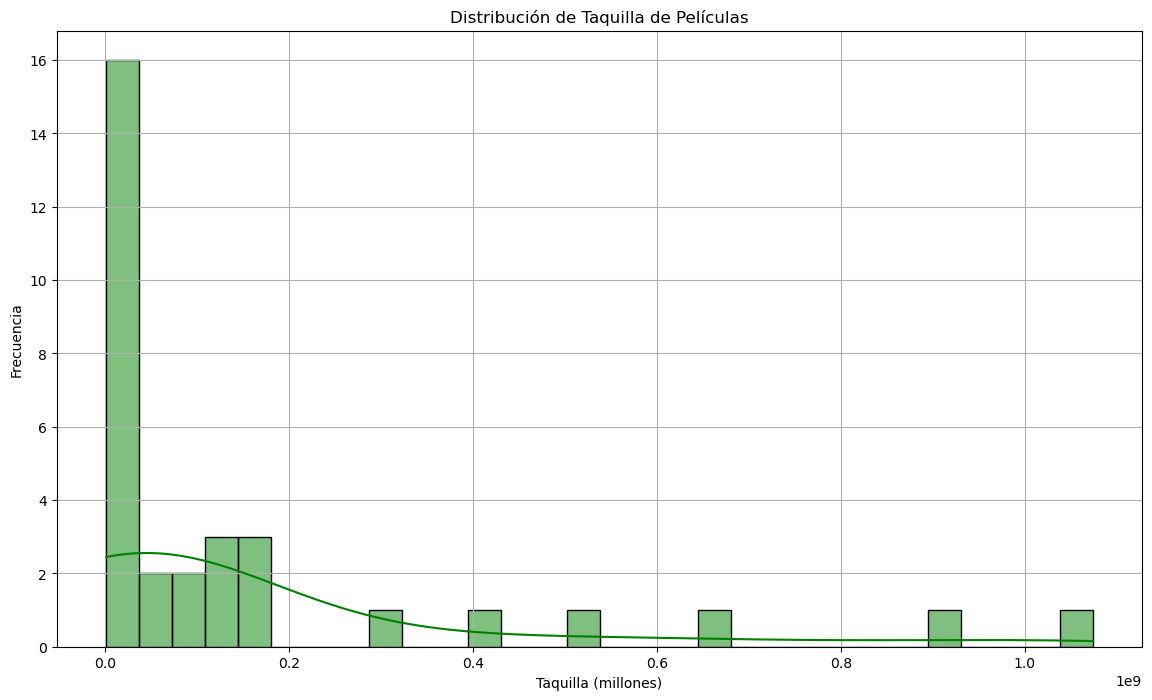

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV en un DataFrame
df_presupuesto = pd.read_csv('data/processed/presupuesto.csv')

# Función para convertir valores de presupuesto y taquilla a números
def convertir_a_numerico(valor):
    valor = valor.lower()
    if 'mil millones' in valor:
        return float(valor.replace(' mil millones', '').replace(',', '')) * 1e9
    elif 'millones' in valor:
        return float(valor.replace(' millones', '').replace(',', '')) * 1e6
    elif 'billion' in valor:
        return float(valor.replace(' billion', '').replace(',', '')) * 1e9
    elif 'million' in valor:
        return float(valor.replace(' million', '').replace(',', '')) * 1e6
    else:
        return float(valor.replace(',', ''))

# Aplicar la función a las columnas 'Presupuesto' y 'Taquilla'
df_presupuesto['Presupuesto'] = df_presupuesto['Presupuesto'].apply(convertir_a_numerico)
df_presupuesto['Taquilla'] = df_presupuesto['Taquilla'].apply(convertir_a_numerico)

# Crear un scatterplot para mostrar la relación entre 'Presupuesto' y 'Taquilla'
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_presupuesto, x='Presupuesto', y='Taquilla', hue='film', palette='viridis', s=100)
plt.title('Relación entre Presupuesto y Taquilla de Películas')
plt.xlabel('Presupuesto (millones)')
plt.ylabel('Taquilla (millones)')
plt.grid(True)
plt.show()

# Crear un histograma para mostrar la distribución de 'Presupuesto'
plt.figure(figsize=(14, 8))
sns.histplot(df_presupuesto['Presupuesto'], kde=True, color='blue', bins=30)
plt.title('Distribución de Presupuesto de Películas')
plt.xlabel('Presupuesto (millones)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Crear un histograma para mostrar la distribución de 'Taquilla'
plt.figure(figsize=(14, 8))
sns.histplot(df_presupuesto['Taquilla'], kde=True, color='green', bins=30)
plt.title('Distribución de Taquilla de Películas')
plt.xlabel('Taquilla (millones)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

C:\Users\jesus\AppData\Local\Temp\ipykernel_9612\1524606031.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_presupuesto['Año'] = df_presupuesto['Año'].fillna(0).astype(int)


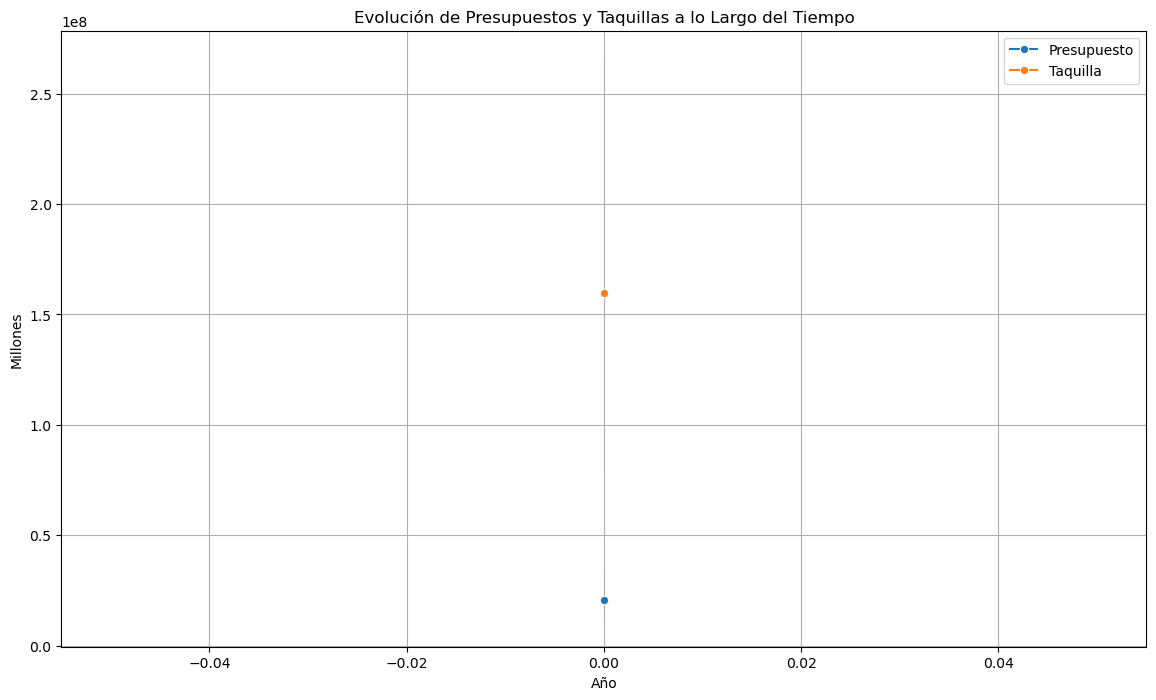

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV en un DataFrame
df_presupuesto = pd.read_csv('data/processed/presupuesto.csv')

# Función para convertir valores de presupuesto y taquilla a números
def convertir_a_numerico(valor):
    valor = valor.lower()
    if 'mil millones' in valor:
        return float(valor.replace(' mil millones', '').replace(',', '')) * 1e9
    elif 'millones' in valor:
        return float(valor.replace(' millones', '').replace(',', '')) * 1e6
    elif 'billion' in valor:
        return float(valor.replace(' billion', '').replace(',', '')) * 1e9
    elif 'million' in valor:
        return float(valor.replace(' million', '').replace(',', '')) * 1e6
    else:
        return float(valor.replace(',', ''))

# Aplicar la función a las columnas 'Presupuesto' y 'Taquilla'
df_presupuesto['Presupuesto'] = df_presupuesto['Presupuesto'].apply(convertir_a_numerico)
df_presupuesto['Taquilla'] = df_presupuesto['Taquilla'].apply(convertir_a_numerico)

# Añadir una columna de años (suponiendo que los años están en la columna 'film' en formato 'film (year)')
df_presupuesto['Año'] = df_presupuesto['film'].str.extract(r'\((\d{4})\)')
df_presupuesto['Año'] = df_presupuesto['Año'].fillna(0).astype(int)

# Crear un gráfico de líneas para mostrar la evolución de los presupuestos a lo largo del tiempo
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_presupuesto, x='Año', y='Presupuesto', marker='o', label='Presupuesto')
sns.lineplot(data=df_presupuesto, x='Año', y='Taquilla', marker='o', label='Taquilla')
plt.title('Evolución de Presupuestos y Taquillas a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Millones')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
merged_df = pd.merge(directores_filtrado1, presupuesto, on='film', how='left')

In [64]:
directores_filtrado1

,year_ceremony,category,name,winner,film
11,1928,DIRECTING (Comedy Picture),Lewis Milestone,True,Two Arabian Knights
13,1928,DIRECTING (Dramatic Picture),Frank Borzage,True,7th Heaven
59,1929,DIRECTING,Frank Lloyd,True,The Divine Lady
98,1930,DIRECTING,Lewis Milestone,True,All Quiet on the Western Front
139,1931,DIRECTING,Norman Taurog,True,Skippy
...,...,...,...,...,...
10306,2020,DIRECTING,Bong Joon Ho,True,Parasite
10433,2021,DIRECTING,Chloé Zhao,True,Nomadland
10553,2022,DIRECTING,Jane Campion,True,The Power of the Dog
10675,2023,DIRECTING,Daniel Kwan and Daniel Scheinert,True,Everything Everywhere All at Once


In [65]:
pd.merge(directores_filtrado1, presupuesto, on='film', how='left')

,year_ceremony,category,name,winner,film,Presupuesto,Taquilla
0,1928,DIRECTING (Comedy Picture),Lewis Milestone,True,Two Arabian Knights,NaN,NaN
1,1928,DIRECTING (Dramatic Picture),Frank Borzage,True,7th Heaven,NaN,NaN
2,1929,DIRECTING,Frank Lloyd,True,The Divine Lady,NaN,NaN
3,1930,DIRECTING,Lewis Milestone,True,All Quiet on the Western Front,NaN,NaN
4,1931,DIRECTING,Norman Taurog,True,Skippy,NaN,NaN
...,...,...,...,...,...,...,...
92,2020,DIRECTING,Bong Joon Ho,True,Parasite,NaN,NaN
93,2021,DIRECTING,Chloé Zhao,True,Nomadland,NaN,NaN
94,2022,DIRECTING,Jane Campion,True,The Power of the Dog,NaN,NaN
95,2023,DIRECTING,Daniel Kwan and Daniel Scheinert,True,Everything Everywhere All at Once,NaN,NaN


In [66]:
merged_df=pd.merge(directores_filtrado1, presupuesto, on='film', how='left')

In [67]:
merged_df['Presupuesto'].isna().sum()

87

Incorporamos gráficas para tener una mejor orientacón de nuestras conclusiones.

In [68]:
#Incorporamos el código para sacar los top 5 actores con más premios.


In [69]:
top_actores

NameError: name 'top_actores' is not defined